In [2]:
%run /content/preprocessing.ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.4 MB/s eta 0:00:00
/content
ls: cannot access '/kaggle/working': No such file or directory


In [10]:
%run /content/plot.ipynb

In [3]:
def train_cnn(X_train,y_train,epoch,model_name,path_savedmodel=None):


    dim=X_train.shape[1]
    model = Sequential()
    model.add(Conv2D(32, 3, activation='relu', input_shape=(dim,dim, 1), padding='same'))
    model.add(Conv2D(64, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss=categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

    if path_savedmodel is None:
        checkpoint = ModelCheckpoint(model_name, monitor='accuracy', verbose=1,
        save_best_only=True, mode='max', save_format='tf')
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, callbacks=[checkpoint],verbose=0)
    else:
        model = load_model(path_savedmodel)
    model.fit(X_train, y_train, epochs=200, batch_size=32,verbose=0)
    return model

In [4]:
def train_svm(X, y, model_save_path):
    clf = SVC(gamma='auto')
    clf.fit(X, y)

    joblib.dump(clf, model_save_path)
    print(f"Model saved to {model_save_path}")

    return clf

In [5]:
def train_xgboost(X, y, model_save_path):
    clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=0).fit(X, y)

    joblib.dump(clf, model_save_path)
    print(f"Model saved to {model_save_path}")

    return clf

In [9]:
df1,df2,df3,df4,df5=preprocess("/content/mRNA.fasta",'/content/lncRNA.fasta')

In [11]:
def batch(df):
    X_train_cnn, X_val_cnn, y_train_cnn, y_val_cnn=split_cnn(df)
    X_train_ml, X_val_ml, y_train_ml, y_val_ml=split_ml(df)
    name_cnn=name=f"model_cnn{str(int((df.shape[1]-1)**(1/2)))}"
    name_svm=name=f"model_svm{str(int((df.shape[1]-1)**(1/2)))}.pkl"
    name_xgboost=name=f"model_xg{str(int((df.shape[1]-1)**(1/2)))}.pkl"
    cnn=train_cnn(X_train_cnn,y_train_cnn,100,name_cnn)
    svm=train_svm(X_train_ml,y_train_ml,name_svm)
    xgboost=train_xgboost(X_train_ml,y_train_ml,name_xgboost)
    plot_cnn(cnn,X_val_cnn,y_val_cnn)
    plot_ml(svm,X_val_ml,y_val_ml,'svm')
    plot_ml(xgboost,X_val_ml,y_val_ml,'xgboost')


Epoch 1: accuracy improved from -inf to 0.50130, saving model to model_cnn4

Epoch 2: accuracy did not improve from 0.50130

Epoch 3: accuracy did not improve from 0.50130

Epoch 4: accuracy did not improve from 0.50130

Epoch 5: accuracy improved from 0.50130 to 0.50418, saving model to model_cnn4

Epoch 6: accuracy improved from 0.50418 to 0.52572, saving model to model_cnn4

Epoch 7: accuracy improved from 0.52572 to 0.53560, saving model to model_cnn4

Epoch 8: accuracy improved from 0.53560 to 0.53917, saving model to model_cnn4

Epoch 9: accuracy improved from 0.53917 to 0.56469, saving model to model_cnn4

Epoch 10: accuracy improved from 0.56469 to 0.57443, saving model to model_cnn4

Epoch 11: accuracy improved from 0.57443 to 0.59322, saving model to model_cnn4

Epoch 12: accuracy improved from 0.59322 to 0.60680, saving model to model_cnn4

Epoch 13: accuracy improved from 0.60680 to 0.61600, saving model to model_cnn4

Epoch 14: accuracy improved from 0.61600 to 0.63150, s

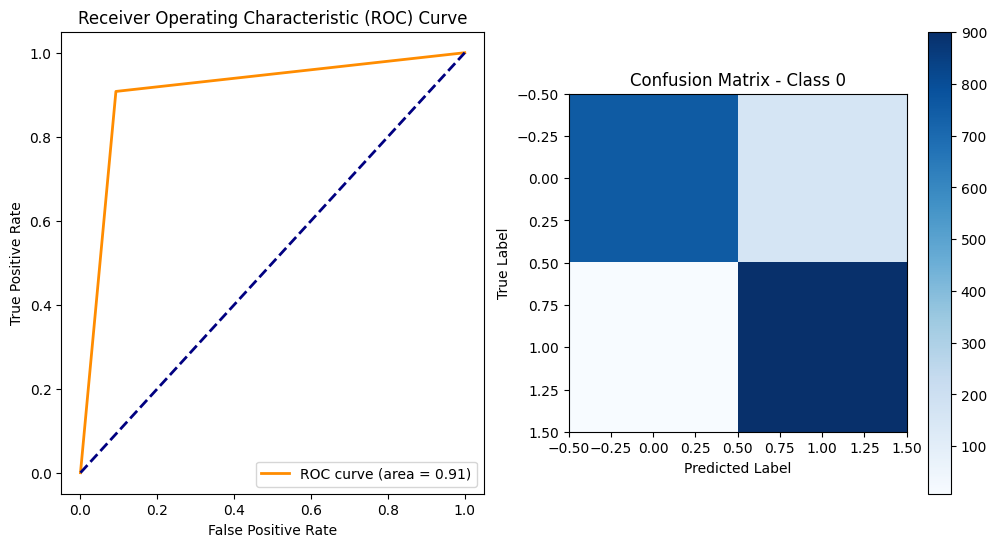

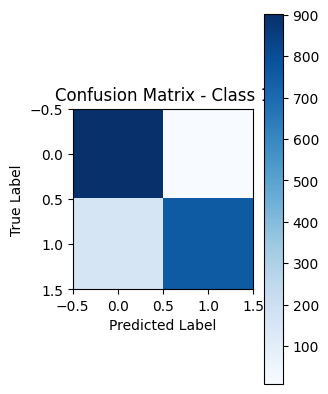

------------------------------------------------------------
svm
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
Confusion Matrix:
[[[620 294]
  [  0 909]]

 [[909   0]
  [294 620]]]


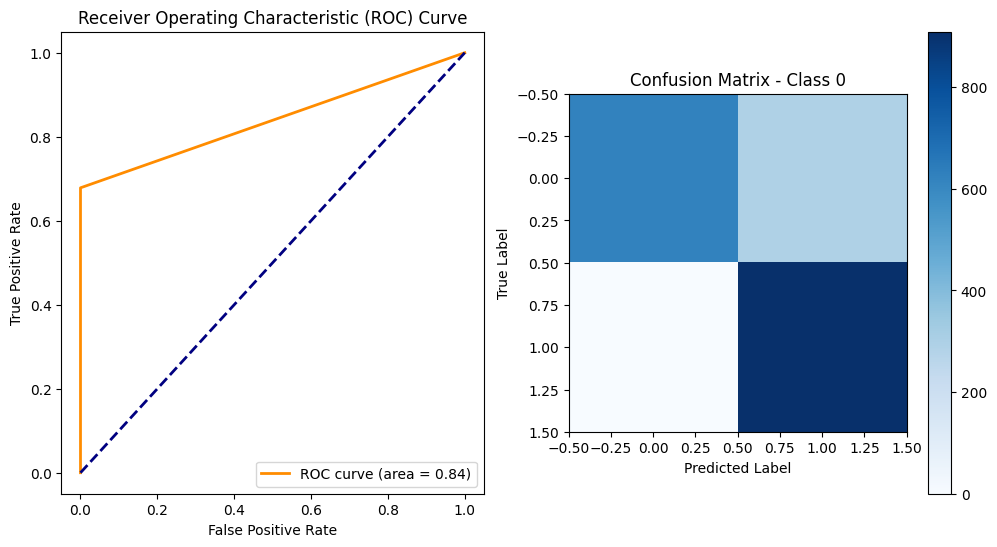

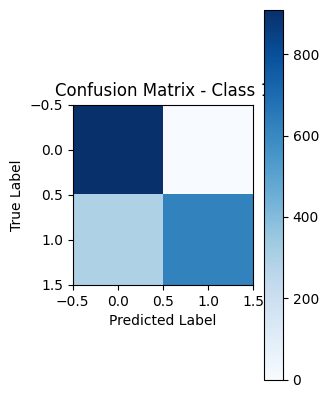



------------------------------------------------------------
xgboost
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[[812 102]
  [ 23 886]]

 [[886  23]
  [102 812]]]


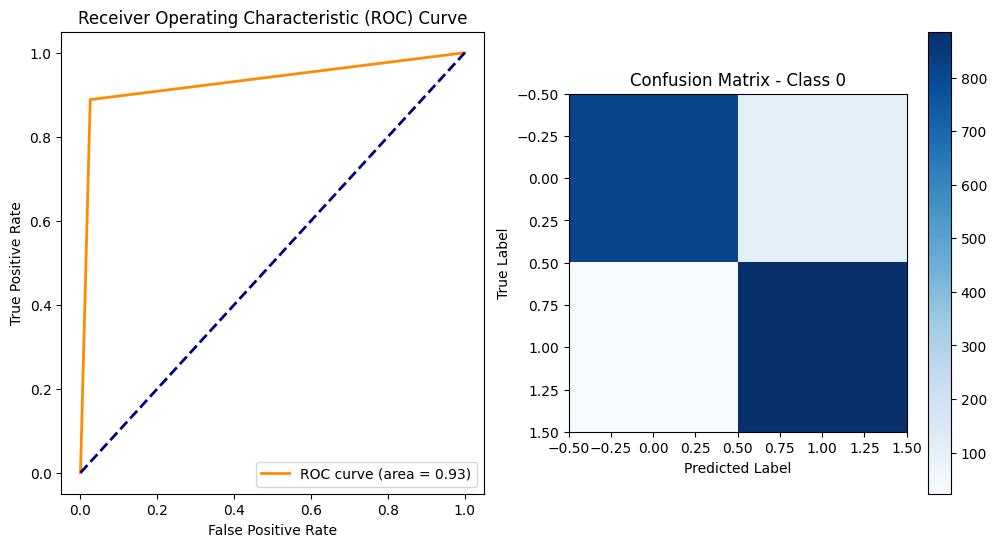

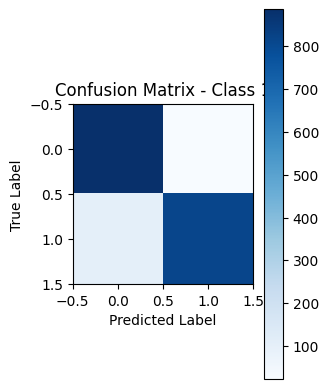

In [12]:
batch(df2)


Epoch 1: accuracy improved from -inf to 0.48937, saving model to model_cnn8

Epoch 2: accuracy did not improve from 0.48937

Epoch 3: accuracy improved from 0.48937 to 0.51050, saving model to model_cnn8

Epoch 4: accuracy did not improve from 0.51050

Epoch 5: accuracy improved from 0.51050 to 0.51708, saving model to model_cnn8

Epoch 6: accuracy did not improve from 0.51708

Epoch 7: accuracy improved from 0.51708 to 0.52737, saving model to model_cnn8

Epoch 8: accuracy improved from 0.52737 to 0.53121, saving model to model_cnn8

Epoch 9: accuracy did not improve from 0.53121

Epoch 10: accuracy improved from 0.53121 to 0.54191, saving model to model_cnn8

Epoch 11: accuracy improved from 0.54191 to 0.54397, saving model to model_cnn8

Epoch 12: accuracy improved from 0.54397 to 0.55906, saving model to model_cnn8

Epoch 13: accuracy improved from 0.55906 to 0.56867, saving model to model_cnn8

Epoch 14: accuracy improved from 0.56867 to 0.58485, saving model to model_cnn8

Epoch

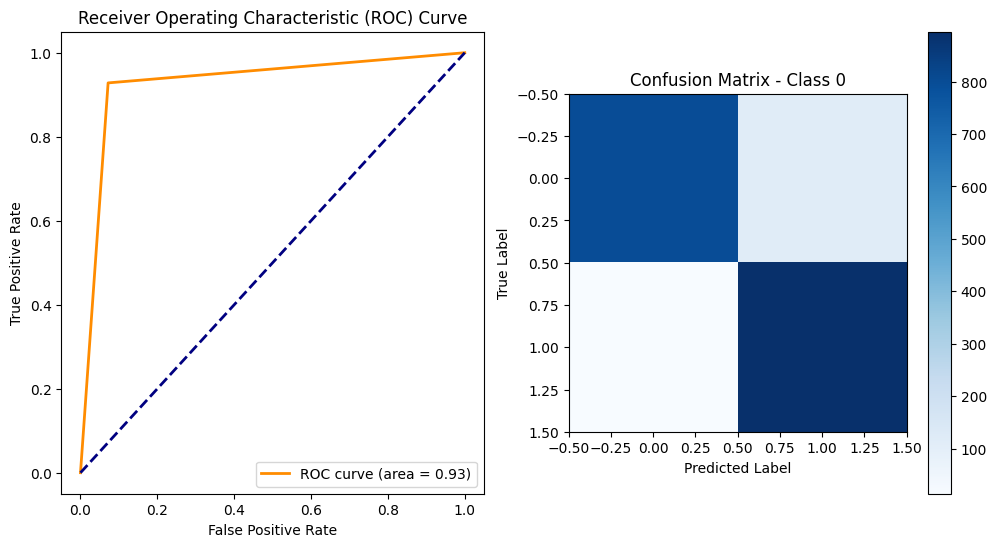

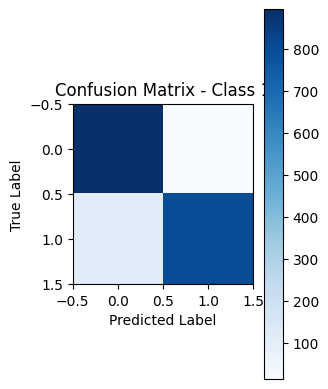

------------------------------------------------------------
svm
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1 Score: 0.82
Confusion Matrix:
[[[591 323]
  [  0 909]]

 [[909   0]
  [323 591]]]


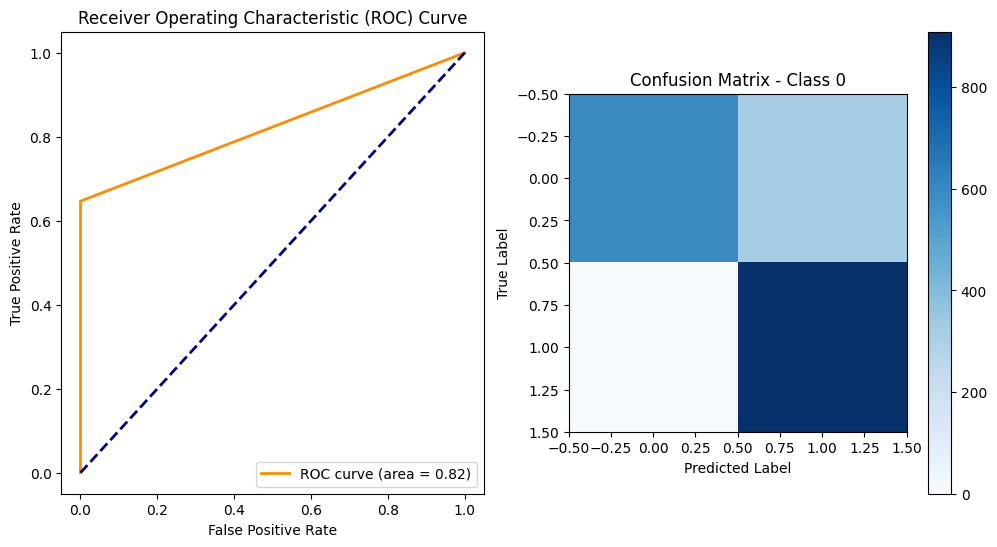

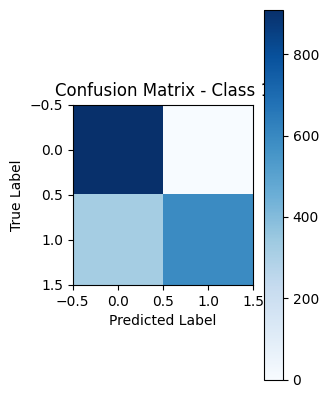



------------------------------------------------------------
xgboost
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Confusion Matrix:
[[[809 105]
  [ 24 885]]

 [[885  24]
  [105 809]]]


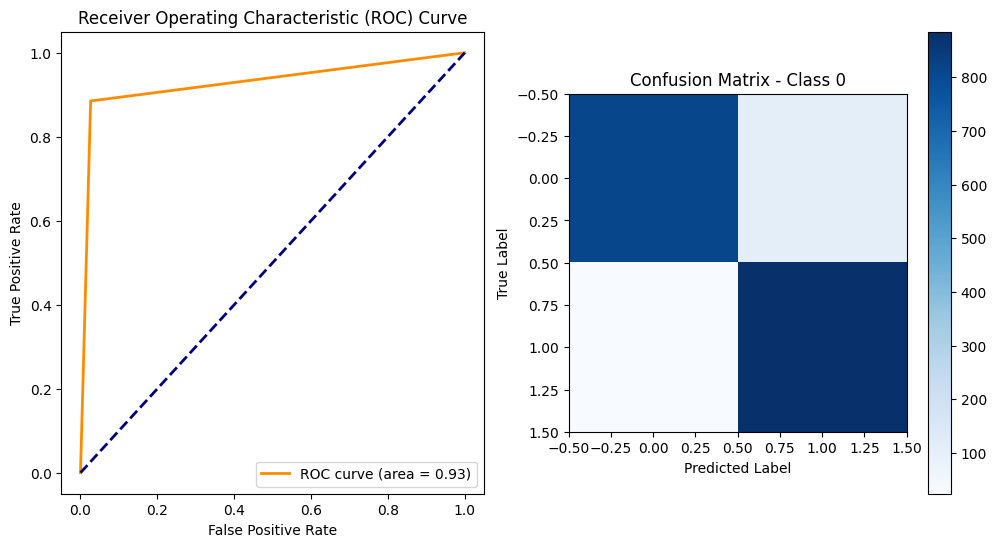

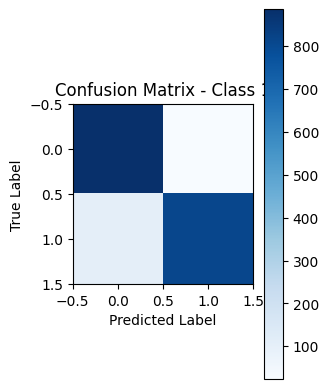

In [13]:
batch(df3)


Epoch 1: accuracy improved from -inf to 0.49691, saving model to model_cnn16

Epoch 2: accuracy did not improve from 0.49691

Epoch 3: accuracy improved from 0.49691 to 0.50213, saving model to model_cnn16

Epoch 4: accuracy improved from 0.50213 to 0.50350, saving model to model_cnn16

Epoch 5: accuracy did not improve from 0.50350

Epoch 6: accuracy improved from 0.50350 to 0.50473, saving model to model_cnn16

Epoch 7: accuracy did not improve from 0.50473

Epoch 8: accuracy did not improve from 0.50473

Epoch 9: accuracy improved from 0.50473 to 0.50583, saving model to model_cnn16

Epoch 10: accuracy improved from 0.50583 to 0.51420, saving model to model_cnn16

Epoch 11: accuracy improved from 0.51420 to 0.52175, saving model to model_cnn16

Epoch 12: accuracy improved from 0.52175 to 0.53217, saving model to model_cnn16

Epoch 13: accuracy improved from 0.53217 to 0.54713, saving model to model_cnn16

Epoch 14: accuracy improved from 0.54713 to 0.57251, saving model to model_cn

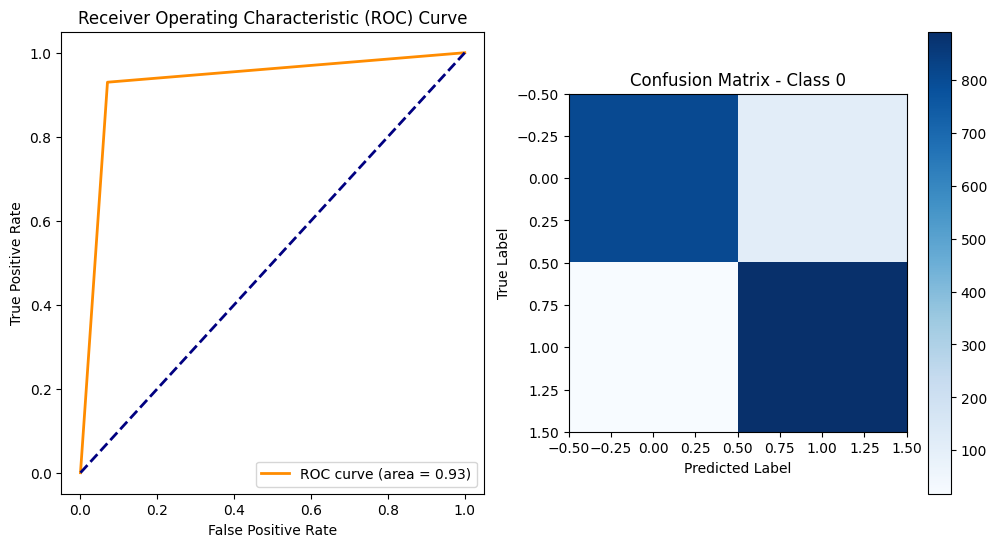

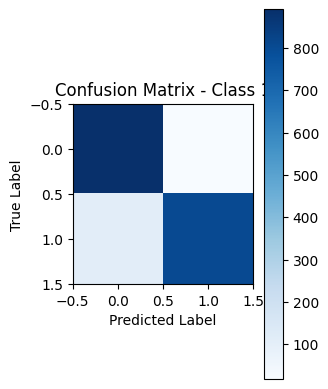

------------------------------------------------------------
svm
Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
Confusion Matrix:
[[[525 389]
  [  0 909]]

 [[909   0]
  [389 525]]]


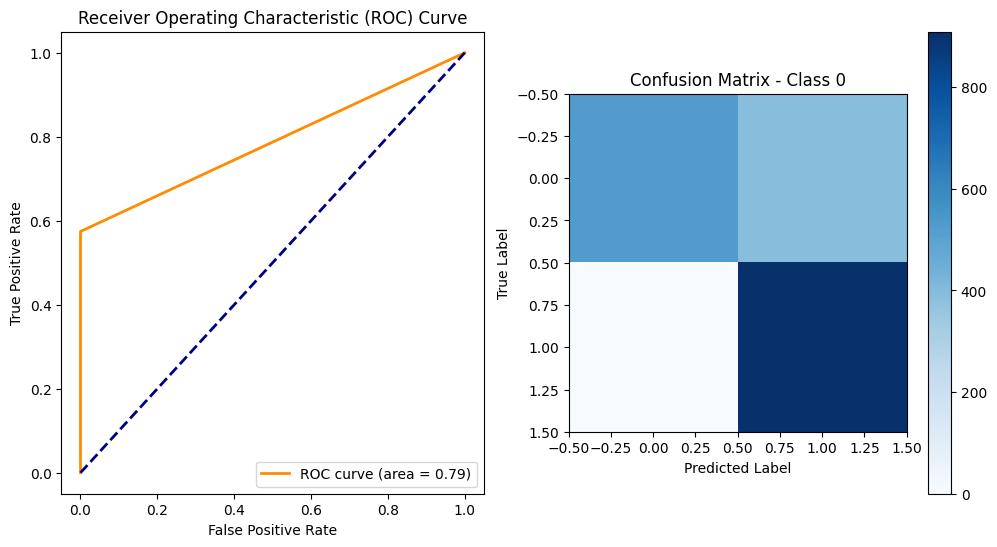

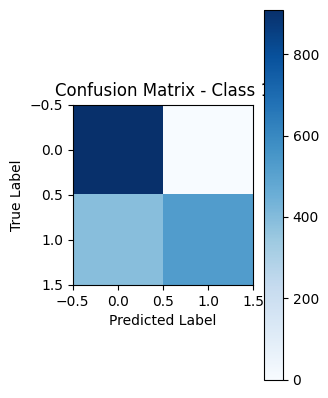



------------------------------------------------------------
xgboost
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Confusion Matrix:
[[[804 110]
  [ 28 881]]

 [[881  28]
  [110 804]]]


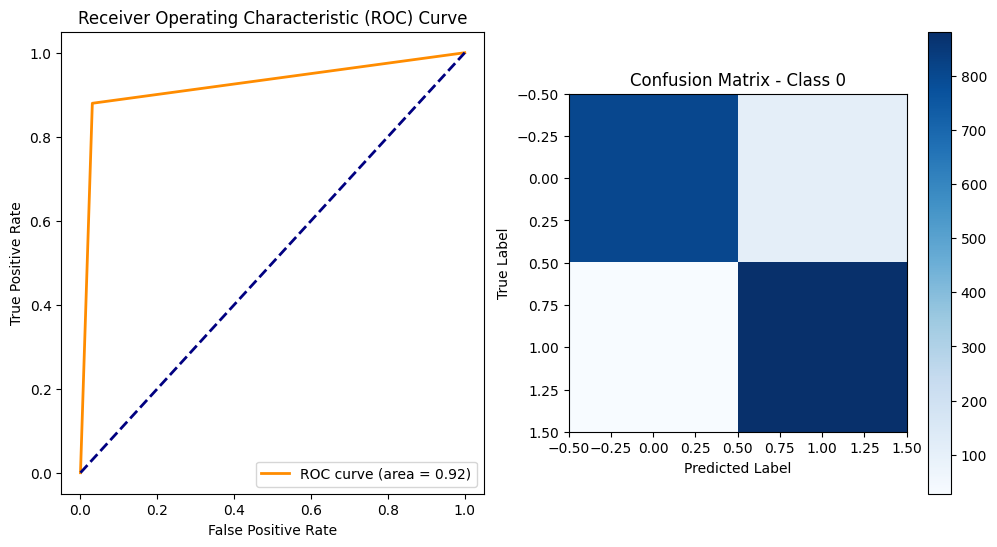

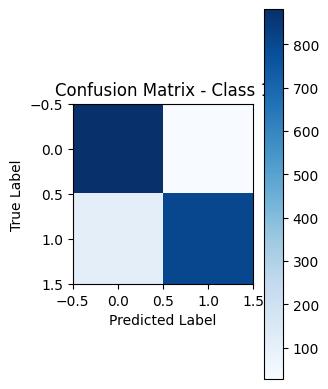

In [14]:
batch(df4)